This file is for test different regularization

# generate the train data and the test data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from anode.models import ODENet
from anode.training import Trainer

device = torch.device('cpu')
from experiments.dataloaders import ConcentricSphere
from torch.utils.data import DataLoader
from viz.plots import single_feature_plt

# Create training data in 2D, consisting of a concentric disk and an annulus
data_dim = 2
data_concentric = ConcentricSphere(data_dim, inner_range=(0., .5), outer_range=(1., 1.5), 
                                   num_points_inner=1000, num_points_outer=2000)
dataloader = DataLoader(data_concentric, batch_size=64, shuffle=True)

# Visualize a batch of data (use a large batch size for visualization)
dataloader_viz = DataLoader(data_concentric, batch_size=256, shuffle=True)
for inputs, targets in dataloader_viz:
    break

    
data_concentric2 = ConcentricSphere(data_dim, inner_range=(0., .5), outer_range=(1., 1.5), 
                                   num_points_inner=100, num_points_outer=200)
dataloader2 = DataLoader(data_concentric2, batch_size=64, shuffle=True)
dataloader_viz2 = DataLoader(data_concentric2, batch_size=256, shuffle=True)
for test_inputs, test_targets in dataloader_viz2:
    break
    
hidden_dim = 32
num_epochs = 24
from viz.plots import input_space_plt



Function for compute the accuacy

In [7]:
def accuacy(model2,test_inputs,test_targets):
    
    predictions = model2(test_inputs)
    predictions=predictions.view(-1,1).detach().numpy()
    for i in range(len(predictions)):
        predictions[i]=1 if predictions[i] > 0 else -1

    accuracy=(predictions==test_targets.detach().numpy()).sum()/len(predictions)
    return accuracy

# train an NODE Network with level = 2 

In [2]:

model2 = ODENet(device, data_dim, hidden_dim, time_dependent=True,
               non_linearity='relu',level=2,eval_time=1)

optimizer2 = torch.optim.Adam(model2.parameters(), lr=1e-3)
trainer2 = Trainer(model2,optimizer2, device)
trainer2.train(dataloader,test_inputs, test_targets, num_epochs)



Iteration 0/47
Loss: 0.658
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/47
Loss: 0.686
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/47
Loss: 0.606
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/47
Loss: 0.620
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/47
Loss: 0.644
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 1: 0.636

Iteration 0/47
Loss: 0.639
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/47
Loss: 0.533
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/47
Loss: 0.515
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/47
Loss: 0.500
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/47
Loss: 0.477
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 2: 0.505

Iteration 0/47
Loss: 0.449
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/47
Loss: 0.411
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/47
Loss: 0.414
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/47
Loss: 0.438
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/47
Loss: 0.392
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 3: 0.398

Iteration 0/47
Loss: 0.326
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/4

# dicision region

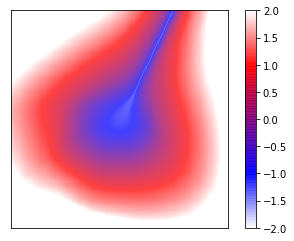

In [4]:


input_space_plt(model2)

# The loss

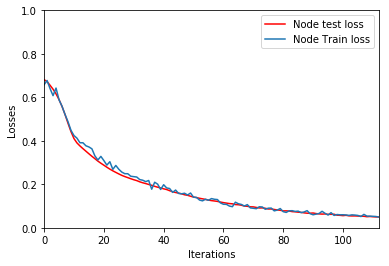

In [3]:
plt.plot(trainer2.histories['test_loss_history'],color='red',label='Node test loss')
plt.plot(trainer2.histories['loss_history'],label='Node Train loss')
plt.xlim(0, len(trainer2.histories['test_loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.legend()



# The accuracy of ODE network

In [17]:
accuacy(model2,test_inputs,test_targets)

1.0

# train an NODE Network with level = 2 using L2 hand written regularization
(just regular weight matrix W)

In [5]:
model = ODENet(device, data_dim, hidden_dim, time_dependent=True,
               non_linearity='relu',level=2,eval_time=1)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
trainer = Trainer(model, optimizer, device,verbose=False)
trainer.train(dataloader,test_inputs, test_targets, num_epochs,R='L2',Rrate=0.001)


# dicision region

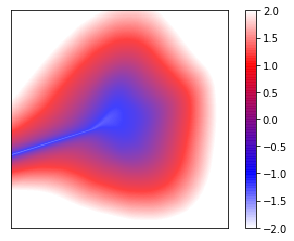

In [7]:

input_space_plt(model)

0.98828125

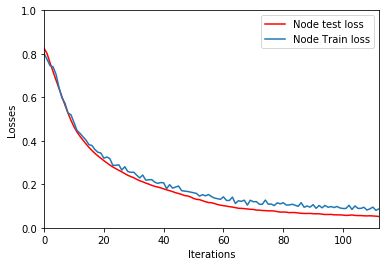

In [8]:

plt.plot(trainer.histories['test_loss_history'],color='red',label='Node test loss')
plt.plot(trainer.histories['loss_history'],label='Node Train loss')
plt.xlim(0, len(trainer.histories['test_loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.legend()



accuacy(model,test_inputs,test_targets)

# train an NODE Network with level = 2 with L2 regularization (W and b)

In [9]:


model4 = ODENet(device, data_dim, hidden_dim, time_dependent=True,
               non_linearity='relu',level=2,eval_time=1)

optimizer4 = torch.optim.Adam(model4.parameters(), lr=1e-3, weight_decay=0.001)
trainer4 = Trainer(model4, optimizer4, device)
trainer4.train(dataloader,test_inputs, test_targets, num_epochs)



Iteration 0/47
Loss: 0.586
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/47
Loss: 0.647
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/47
Loss: 0.579
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/47
Loss: 0.472
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/47
Loss: 0.473
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 1: 0.549

Iteration 0/47
Loss: 0.499
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/47
Loss: 0.507
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/47
Loss: 0.542
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/47
Loss: 0.410
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/47
Loss: 0.463
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 2: 0.457

Iteration 0/47
Loss: 0.532
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/47
Loss: 0.419
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/47
Loss: 0.357
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/47
Loss: 0.444
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/47
Loss: 0.346
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 3: 0.392

Iteration 0/47
Loss: 0.379
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/4

# dicision region

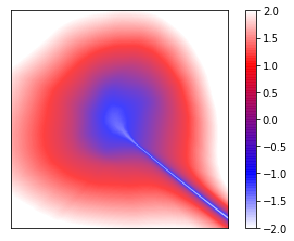

In [81]:

input_space_plt(model4)

0.96484375

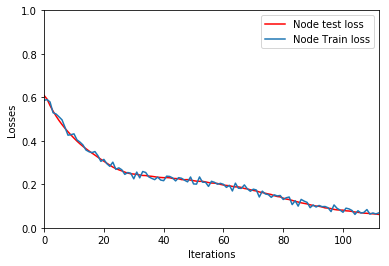

In [10]:

plt.plot(trainer4.histories['test_loss_history'],color='red',label='Node test loss')
plt.plot(trainer4.histories['loss_history'],label='Node Train loss')
plt.xlim(0, len(trainer4.histories['test_loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.legend()



accuacy(model4,test_inputs,test_targets)

# train an NODE Network with level = 2 with L1 regularization (W)

In [11]:
model3 = ODENet(device, data_dim, hidden_dim, time_dependent=True,
               non_linearity='relu',level=2,eval_time=1)

optimizer3 = torch.optim.Adam(model3.parameters(), lr=1e-3)
trainer3 = Trainer(model3, optimizer3, device)
trainer3.train(dataloader,test_inputs, test_targets, num_epochs,R='L1',Rrate=0.001)


Iteration 0/47
Loss: 0.551
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/47
Loss: 0.495
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/47
Loss: 0.488
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/47
Loss: 0.553
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/47
Loss: 0.573
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 1: 0.526

Iteration 0/47
Loss: 0.473
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/47
Loss: 0.478
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/47
Loss: 0.485
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/47
Loss: 0.487
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/47
Loss: 0.429
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 2: 0.474

Iteration 0/47
Loss: 0.413
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/47
Loss: 0.470
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/47
Loss: 0.450
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/47
Loss: 0.421
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/47
Loss: 0.406
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 3: 0.434

Iteration 0/47
Loss: 0.402
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/4

# dicision region

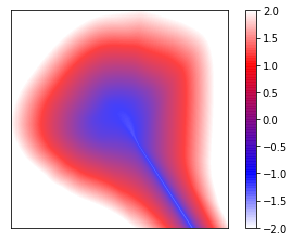

In [10]:

input_space_plt(model3)

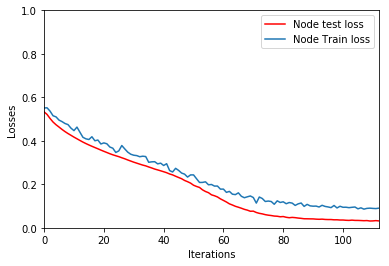

In [12]:

plt.plot(trainer3.histories['test_loss_history'],color='red',label='Node test loss')
plt.plot(trainer3.histories['loss_history'],label='Node Train loss')
plt.xlim(0, len(trainer3.histories['test_loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.legend()


# The accuracies of these 4 cases 

In [83]:
print('test accuracy \nNo-Regularization:')
print(accuacy(model2,test_inputs,test_targets))
print('L2:')
print(accuacy(model,test_inputs,test_targets))
print('L2 with b:')
print(accuacy(model4,test_inputs,test_targets))
print('L1:')
print(accuacy(model3,test_inputs,test_targets))


test accuracy 
No-Regularization:
0.9921875
L2:
0.98046875
L2 with b:
0.99609375
L1:
0.9765625
